<a href="https://colab.research.google.com/github/mateosuster/pythonungs/blob/master/codigos/pandas/Pr%C3%A1ctica_Visualizacion_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



## <center>Introducción a la Ciencia de Datos</center>
### <center> Práctica introducción a Pandas y visualizaciones</center>


<center>Ejemplos de visualizaciones utilizando el dataset Titanic provisto por Kaggle</center>

Links de interés
 
https://pandas.pydata.org
 
https://matplotlib.org
 
https://seaborn.pydata.org


Importamos todas las librerías que vamos a utilizar

In [ ]:
import numpy as np 
import pandas as pd

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### <center> Repaso b&aacute;sico de Pandas </center>

Cargamos el archivo de datos en un dataframe de Pandas

In [ ]:
url='https://docs.google.com/spreadsheets/d/1bAk9A7zHIlQ6vQSRjOn_GFCxa9Cb3Tsj/edit?usp=sharing&ouid=101465130384122033115&rtpof=true&sd=true'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
ds_titanic=pd.read_excel(url)

Realizamos una copia del dataset sobre el cual vamos a trabajar para no alterar los datos originales

In [ ]:
ds_trabajo=ds_titanic.copy()

Mostramos las primeras y últimas filas del dataset

In [ ]:
ds_trabajo.head(2)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"


In [ ]:
ds_trabajo.tail(2)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.225,NaN,C,NaN,NaN,NaN
1308,3,0,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.875,NaN,S,NaN,NaN,NaN


Listar la cantidad de filas y columnas que tiene el dataset

In [ ]:
ds_trabajo.shape

(1309, 14)

Este dataset contiene 1309 filas y 14 columnas

Listar los nombres de las columnas del dataset

In [ ]:
ds_trabajo.columns.tolist()

['pclass',
 'survived',
 'name',
 'sex',
 'age',
 'sibsp',
 'parch',
 'ticket',
 'fare',
 'cabin',
 'embarked',
 'boat',
 'body',
 'home.dest']

<b>Descripción de los campos</b><br>
PassengerId: Identificador del pasajero dentro de la tabla<br>
Survived: Indica si el pasajero sobrevivió<br>
Pclass: clase de pasajero primera(1), segunda (2) o tercera (3) <br>
Name: Nombre del pasajero <br>
Sex: Sexo del pasajero<br>
Age: Edad<br>
SibSp: Cantidad de hermanas/os o esposas/os a bordo<br>
Parch: Cantidad de padres o hijos a bordo<br>
Ticket: Número de ticket<br>
Fate: Tarifa <br>
Cabin: Cabina en la cual se encuentra alojado el pasajero<br>
Embarked: Puerta de embarque<br>

Mostrar el tipo de cada columna del dataframe

In [ ]:
ds_trabajo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [ ]:
ds_trabajo.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

Cambiar nombre a una columna

In [ ]:
columnas={"pclass":"PassengerClass"}
ds_trabajo.rename(columns = columnas, inplace = True)
ds_trabajo.head(2)

,PassengerClass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"


Listar la cantidad de datos nulos por columna

In [ ]:
ds_trabajo.isna()

,PassengerClass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False,True,True,False
3,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,False,False,False,False,False,False,False,False,False,True,False,True,False,True
1305,False,False,False,False,True,False,False,False,False,True,False,True,True,True
1306,False,False,False,False,False,False,False,False,False,True,False,True,False,True
1307,False,False,False,False,False,False,False,False,False,True,False,True,True,True


In [ ]:
print(ds_trabajo.isna().sum())

PassengerClass       0
survived             0
name                 0
sex                  0
age                263
sibsp                0
parch                0
ticket               0
fare                 1
cabin             1014
embarked             2
boat               823
body              1188
home.dest          564
dtype: int64


Listar la cantidad de datos no nulos por columna

In [ ]:
print(ds_trabajo.count())

PassengerClass    1309
survived          1309
name              1309
sex               1309
age               1046
sibsp             1309
parch             1309
ticket            1309
fare              1308
cabin              295
embarked          1307
boat               486
body               121
home.dest          745
dtype: int64


Analizar algunas combinaciones de variables

In [ ]:
pd.crosstab(ds_trabajo['survived'],ds_trabajo['sex'])

sex,female,male
survived,,
0,127,682
1,339,161


In [ ]:
ds_trabajo.groupby(['PassengerClass','sex'])['survived'].sum()

PassengerClass  sex   
1               female    139
                male       61
2               female     94
                male       25
3               female    106
                male       75
Name: survived, dtype: int64

Mostrar información de resumen del dataset

In [ ]:
ds_trabajo.describe()

,PassengerClass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


Seleccionar fila por posición

In [ ]:
ds_trabajo.iloc[0]

PassengerClass                                1
survived                                      1
name              Allen, Miss. Elisabeth Walton
sex                                      female
age                                        29.0
sibsp                                         0
parch                                         0
ticket                                    24160
fare                                   211.3375
cabin                                        B5
embarked                                      S
boat                                          2
body                                        NaN
home.dest                          St Louis, MO
Name: 0, dtype: object

Seleccionar columna por posición

In [ ]:
ds_trabajo.iloc[:,0]

0       1
1       1
2       1
3       1
4       1
       ..
1304    3
1305    3
1306    3
1307    3
1308    3
Name: PassengerClass, Length: 1309, dtype: int64

##### Seleccionar columna por nombre

In [ ]:
ds_trabajo.loc[:,"name"]   #ds_trabajo["name"]

0                         Allen, Miss. Elisabeth Walton
1                        Allison, Master. Hudson Trevor
2                          Allison, Miss. Helen Loraine
3                  Allison, Mr. Hudson Joshua Creighton
4       Allison, Mrs. Hudson J C (Bessie Waldo Daniels)
                             ...                       
1304                               Zabour, Miss. Hileni
1305                              Zabour, Miss. Thamine
1306                          Zakarian, Mr. Mapriededer
1307                                Zakarian, Mr. Ortin
1308                                 Zimmerman, Mr. Leo
Name: name, Length: 1309, dtype: object

In [ ]:
ds_trabajo["name"]

0                         Allen, Miss. Elisabeth Walton
1                        Allison, Master. Hudson Trevor
2                          Allison, Miss. Helen Loraine
3                  Allison, Mr. Hudson Joshua Creighton
4       Allison, Mrs. Hudson J C (Bessie Waldo Daniels)
                             ...                       
1304                               Zabour, Miss. Hileni
1305                              Zabour, Miss. Thamine
1306                          Zakarian, Mr. Mapriededer
1307                                Zakarian, Mr. Ortin
1308                                 Zimmerman, Mr. Leo
Name: name, Length: 1309, dtype: object

##### Selección de filas en función de características de columnas

In [ ]:
ds_trabajo.loc[:,"survived"]==1

0        True
1        True
2       False
3       False
4       False
        ...  
1304    False
1305    False
1306    False
1307    False
1308    False
Name: survived, Length: 1309, dtype: bool

In [ ]:
ds_trabajo["survived"]==1

0        True
1        True
2       False
3       False
4       False
        ...  
1304    False
1305    False
1306    False
1307    False
1308    False
Name: survived, Length: 1309, dtype: bool

In [ ]:
ds_trabajo.loc[ds_trabajo.loc[:,"survived"]==1,:]

,PassengerClass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1261,3,1,"Turkula, Mrs. (Hedwig)",female,63.0000,0,0,4134,9.5875,NaN,S,15,NaN,NaN
1277,3,1,"Vartanian, Mr. David",male,22.0000,0,0,2658,7.2250,NaN,C,13 15,NaN,NaN
1286,3,1,"Whabee, Mrs. George Joseph (Shawneene Abi-Saab)",female,38.0000,0,0,2688,7.2292,NaN,C,C,NaN,NaN
1290,3,1,"Wilkes, Mrs. James (Ellen Needs)",female,47.0000,1,0,363272,7.0000,NaN,S,NaN,NaN,NaN


##### Eliminar columma

In [ ]:
ds_trabajo.drop('passengerid', axis='columns', inplace=True)  #Elimina columna sobre el mismo dataframe
ds_trabajo.columns.tolist()

['pclass',
 'survived',
 'name',
 'sex',
 'age',
 'sibsp',
 'parch',
 'ticket',
 'fare',
 'cabin',
 'embarked',
 'boat',
 'body',
 'home.dest']

##### Eliminar fila por condición

In [ ]:
ds_trabajo_sobrevivientes=ds_trabajo.copy()
ds_trabajo_sobrevivientes.drop(ds_trabajo[ds_trabajo["survived"]==0].index, axis='index',inplace=True)
ds_trabajo_sobrevivientes.shape

(500, 14)

In [ ]:
ds_trabajo_sobrevivientes=ds_trabajo.copy()
ds_trabajo_sobrevivientes.drop(ds_trabajo.loc[ds_trabajo.loc[:,"survived"]==0,:].index, axis='index', inplace=True)
ds_trabajo_sobrevivientes.shape

(500, 14)

In [ ]:
ds_trabajo_sobrevivientes.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160.0,211.3375,B5,S,2.0,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781.0,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
5,1.0,1.0,"Anderson, Mr. Harry",male,48.0000,0.0,0.0,19952.0,26.5500,E12,S,3,NaN,"New York, NY"
6,1.0,1.0,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1.0,0.0,13502.0,77.9583,D7,S,10,NaN,"Hudson, NY"
8,1.0,1.0,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2.0,0.0,11769.0,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"


##### Cambiar valores de features

In [ ]:
ds_trabajo_reemplazo_valores=ds_trabajo.copy()

ds_trabajo_reemplazo_valores.loc[ds_trabajo_reemplazo_valores.loc[:,"survived"]==1,"survived"]="Yes"
ds_trabajo_reemplazo_valores.loc[ds_trabajo_reemplazo_valores.loc[:,"survived"]==0,"survived"]="No"

ds_trabajo_reemplazo_valores.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,Yes,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160.0,211.3375,B5,S,2.0,NaN,"St Louis, MO"
1,1.0,Yes,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781.0,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,No,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781.0,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,No,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781.0,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,No,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781.0,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [ ]:
ds_trabajo.loc[:,"survived"].replace(to_replace=[0,1],value=["No","Yes"],inplace=True)

ds_trabajo.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,Yes,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160.0,211.3375,B5,S,2.0,NaN,"St Louis, MO"
1,1.0,Yes,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781.0,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,No,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781.0,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,No,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781.0,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,No,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781.0,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


### <center> Análisis exploratorio inicial </center>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

### <center> Análisis exploratorio de algunas variables de interés </center> 

### Gráfico de barras

Gráfico de frecuencias para variables cualitativas

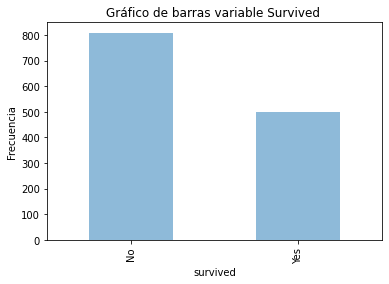

In [ ]:
#Gráfico de barras con Pandas

grf_ds=ds_trabajo['survived'].value_counts().plot.bar(alpha=0.5 , title="Gráfico de barras variable Survived " , xlabel="Superviviente" , ylabel="Frecuencia")

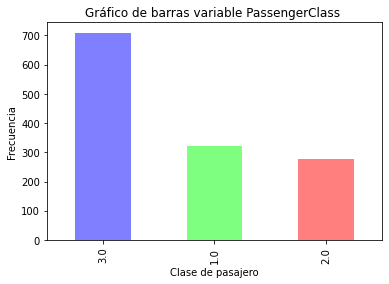

In [ ]:
colores=[(0,0,1),(0,1,0),(1,0,0)]
grf=ds_trabajo['pclass'].value_counts().plot.bar(alpha=0.5,color=colores, title="Gráfico de barras variable PassengerClass ", xlabel="Clase de pasajero",ylabel="Frecuencia") 
#plot(kind="bar",alpha=0.5,color=colores)

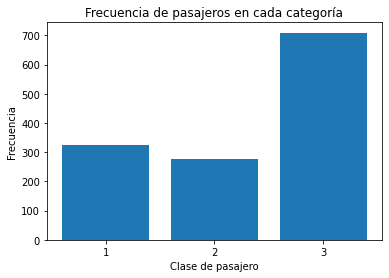

In [ ]:
#Gráfico de barras con Matplotlib
ds_agrupado_Pclass=ds_trabajo.groupby(['pclass']).count()  #Calculo la frecuencia de cada categoría

ds_agrupado_Pclass

eje_x = ds_agrupado_Pclass.index.tolist()   ## Declaramos valores para el eje x
eje_y = ds_agrupado_Pclass['survived'].tolist()  ## Declaramos valores para el eje y

plt.locator_params('x', nbins=3)
plt.bar(eje_x, eje_y) ## Creamos Gráfica

plt.ylabel('Frecuencia') # Leyenda en el eje y
plt.xlabel('Clase de pasajero') # Leyenda en el eje x 
plt.title('Frecuencia de pasajeros en cada categoría') ## Título de Gráfica
 
plt.show() ## Mostramos Gráfica

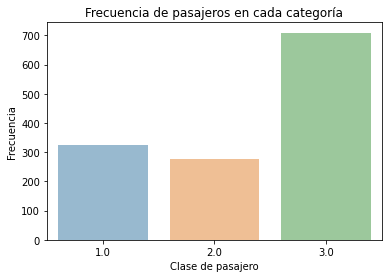

In [ ]:
#Gráfico de barras con Seaborn
ds_agrupado_Pclass=ds_trabajo.groupby(['pclass']).count()  #Calculo la frecuencia de cada categoría

eje_x = ds_agrupado_Pclass.index.tolist()   ## Declaramos valores para el eje x
eje_y = ds_agrupado_Pclass['survived'].tolist()  ## Declaramos valores para el eje y

sns_bar_plot=sns.barplot(x=eje_x, y=eje_y, data=ds_agrupado_Pclass ,alpha=0.5).set(title="Frecuencia de pasajeros en cada categoría",ylabel='Frecuencia',xlabel='Clase de pasajero')

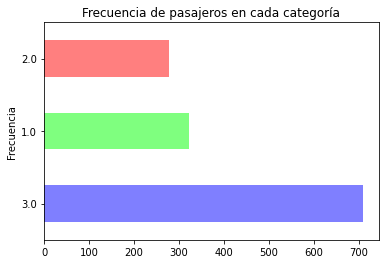

In [ ]:
colores=[(0,0,1),(0,1,0),(1,0,0)]
grf=ds_trabajo['pclass'].value_counts().plot.barh(alpha=0.5,color=colores, title="Frecuencia de pasajeros en cada categoría",xlabel='Frecuencia',ylabel='Clase de pasajero')  
#plot(kind="barh",alpha=0.5,color=colores)

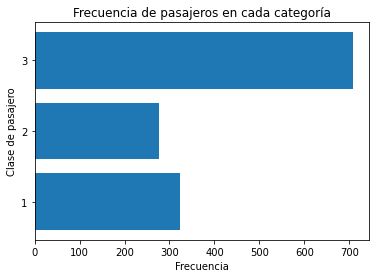

In [ ]:
#MatplotLib
ds_agrupado_Pclass=ds_trabajo.groupby(['pclass']).count()  #Calculo la frecuencia de cada categoría

eje_x = ds_agrupado_Pclass.index.tolist()   ## Declaramos valores para el eje x
eje_y = ds_agrupado_Pclass['survived'].tolist()  ## Declaramos valores para el eje y

plt.locator_params('y', nbins=3)
plt.barh(eje_x, eje_y) ## Creamos Gráfico

plt.ylabel('Clase de pasajero') ## Leyenda en el eje y
plt.xlabel('Frecuencia') ## Leyenda en el eje x 
plt.title('Frecuencia de pasajeros en cada categoría') ## Título de Gráfica
 
plt.show() ## Mostramos Gráfico

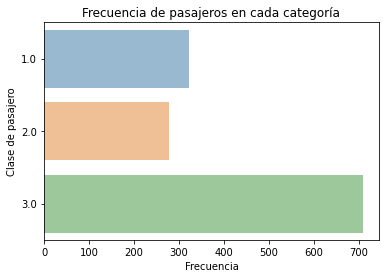

In [ ]:
#Seaborn
ds_agrupado_Pclass=ds_trabajo.groupby(['pclass']).count()  #Calculo la frecuencia de cada categoría

eje_y = ds_agrupado_Pclass.index.tolist()   ## Declaramos valores para el eje x
eje_x = ds_agrupado_Pclass['survived'].tolist()  ## Declaramos valores para el eje y

sns_bar_plot=sns.barplot(x=eje_x, y=eje_y, data=ds_agrupado_Pclass ,alpha=0.5, orient="h").set(title="Frecuencia de pasajeros en cada categoría",xlabel='Frecuencia',ylabel='Clase de pasajero')

### Histogramas

Gráfico de frecuencias para variables cuantitativas (en caso de variables cuantitativas se utiliza un gráfico de barras)

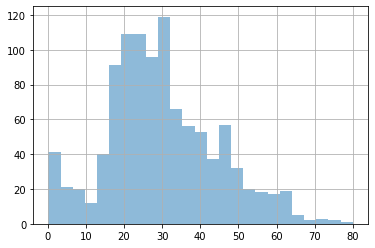

In [ ]:
# Histogramas con Pandas

grf=ds_trabajo['age'].hist(alpha=0.5,bins=25)

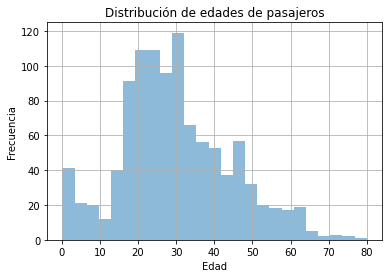

In [ ]:
# Histogramas con matplotlib

plt.title('Distribución de edades de pasajeros')
plt.hist(ds_trabajo['age'], bins = 25 , alpha = 0.5)
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

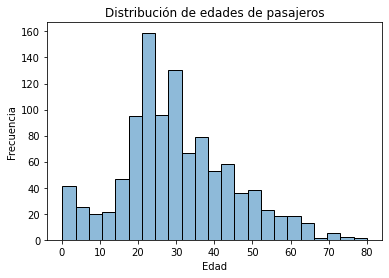

In [ ]:
#Histogramas con Seaborn
sns_hist=sns.histplot(data=ds_trabajo['age'], alpha = 0.5).set(title="Distribución de edades de pasajeros",xlabel="Edad",ylabel="Frecuencia")

### Gráficos de densidad

Representación de la distribución de una variables <br>
(Histograma suavizado)

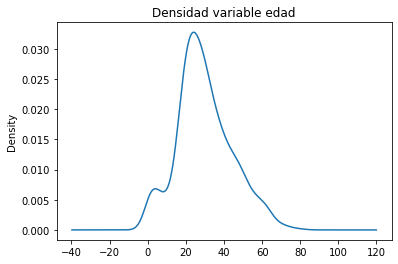

In [ ]:
# Gráficos de densidad con Pandas
grf=ds_trabajo['age'].plot.kde(title="Densidad variable edad",xlabel="Edad",ylabel="Densidad")

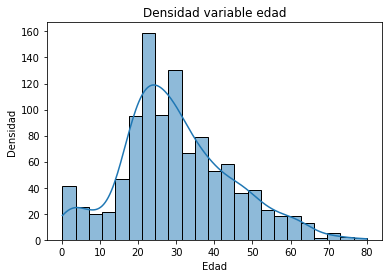

In [ ]:
# Gráficos de densidad con Seaborn
sns_hist=sns.histplot(data=ds_trabajo['age'], kde=True, alpha = 0.5).set(title="Densidad variable edad",xlabel="Edad",ylabel="Densidad")

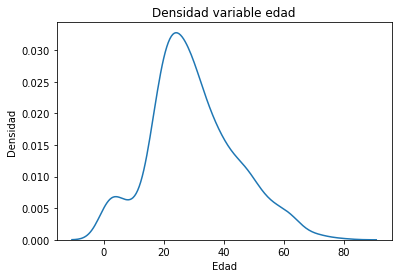

In [ ]:
# Gráficos de densidad con Seaborn
sns_hist=sns.kdeplot(data=ds_trabajo['age']).set(title="Densidad variable edad",xlabel="Edad",ylabel="Densidad")

### Boxplots

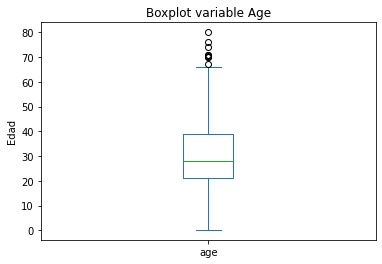

In [ ]:
# Boxplots con Pandas
grf=ds_trabajo['age'].plot.box(title="Boxplot variable Age",xlabel=" ",ylabel="Edad")

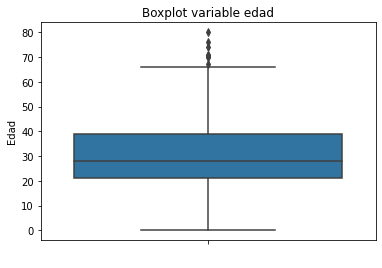

In [ ]:
# Boxplots con Seaborn
grf=sns.boxplot(y="age", data=ds_trabajo).set(title="Boxplot variable edad",xlabel=" ",ylabel="Edad")

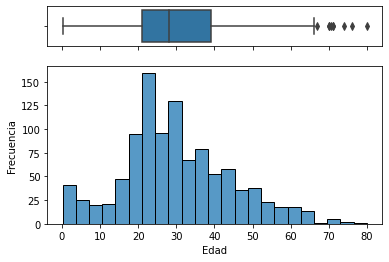

In [ ]:
 
# Creamos una figura compuesta de otras dos figuras
f, (boxplot, hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.2, .8)})
 
# Creamos histograma
sns.histplot(data=ds_trabajo['age'], ax=hist).set(xlabel='Edad',ylabel='Frecuencia')
#Creamos boxplot
sns.boxplot(ds_trabajo['age'], ax=boxplot).set(xlabel="Edad",ylabel="")

boxplot.set(xlabel='')
plt.show()

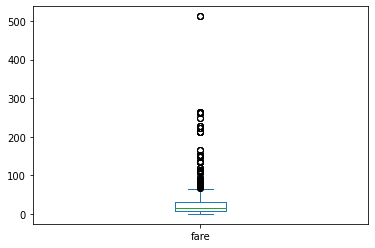

In [ ]:
ds_trabajo['fare'].plot.box()

In [ ]:
ds_trabajo.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,Yes,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160.0,211.3375,B5,S,2.0,NaN,"St Louis, MO"
1,1.0,Yes,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781.0,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,No,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781.0,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,No,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781.0,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,No,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781.0,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


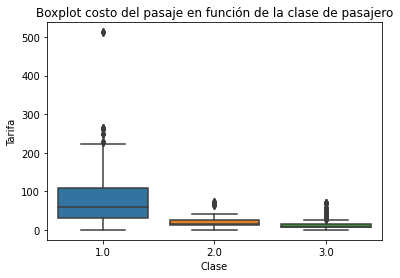

In [ ]:
#Boxplots con Seaborn
sns_boxplot_fare_pclass=sns.boxplot(x="pclass",y="fare", data=ds_trabajo).set(title="Boxplot costo del pasaje en función de la clase de pasajero",xlabel='Clase',ylabel='Tarifa')

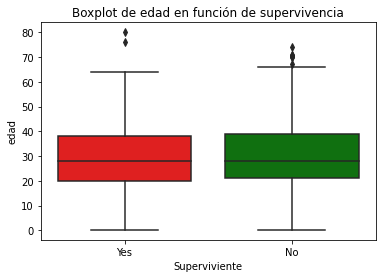

In [ ]:
#Boxplots con Seaborn
grf=sns.boxplot(x="survived",y="age", data=ds_trabajo, palette=["r", "g"]).set(title="Boxplot de edad en función de supervivencia",xlabel='Superviviente',ylabel='edad')

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


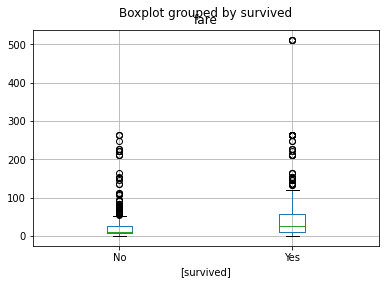

In [ ]:
#Boxplots con Pandas
grf=ds_trabajo[["survived","fare"]].boxplot(by="survived")

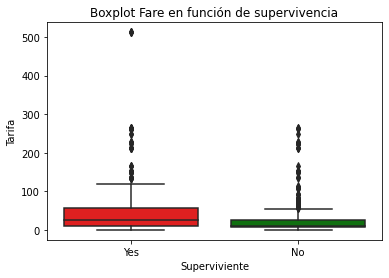

In [ ]:
#Boxplots con Seaborn
sns_boxplot_fare_pclass=sns.boxplot(x="survived",y="fare", data=ds_trabajo, palette=["r", "g"]).set(title="Boxplot Fare en función de supervivencia",xlabel='Superviviente',ylabel='Tarifa')

### Gráficos de a pares

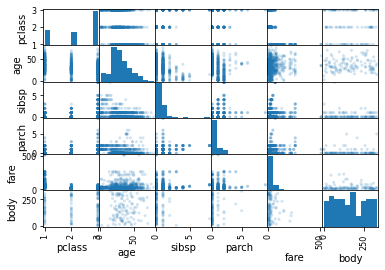

In [ ]:
#Gráficos de a pares de variables con Pandas

from pandas.plotting import scatter_matrix

columns=ds_trabajo.columns.tolist()
columns.remove('survived')
ds_scatter_matrix=ds_trabajo[columns].copy()
scatter_matrix(ds_scatter_matrix, alpha=0.2);

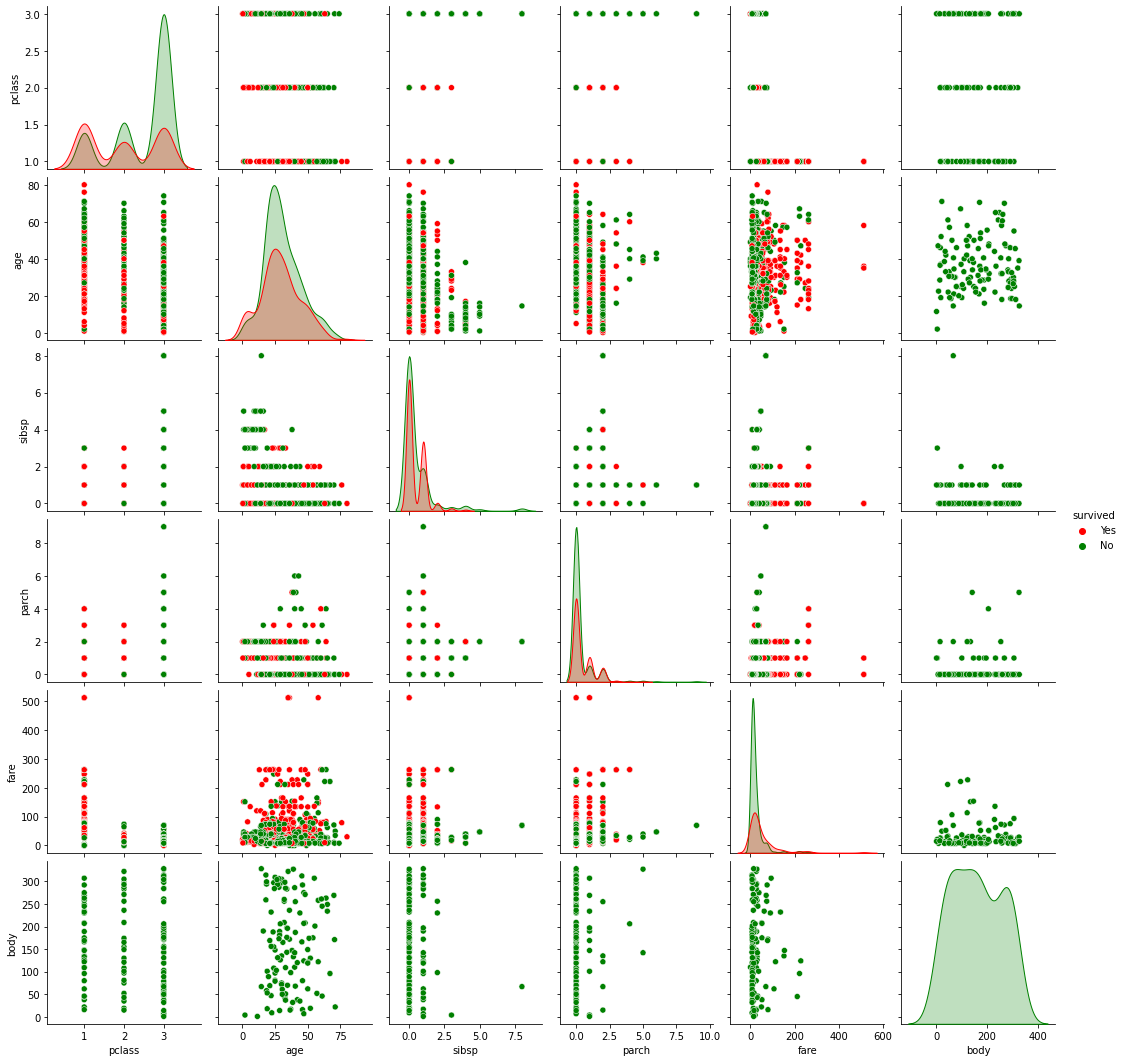

In [ ]:
#Gráficos de a pares de variables con Seaborn
columns=ds_trabajo.columns.tolist()
#columns.remove('PassengerId')
ds_pariplot=ds_trabajo[columns].copy()
graf_pairplot=sns.pairplot(data=ds_pariplot, hue="survived", palette=["r", "g"])

### Dispersogramas

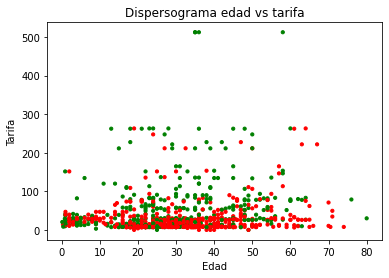

In [ ]:
#Dispersograma con Pandas
#ds_trabajo.plot.scatter(x="Age", y="Fare", c="Survived", cmap="viridis", s=50);

col = ds_trabajo.survived.map({"No":'r', "Yes":'g'})

grf=ds_trabajo.plot.scatter(x="age", y="fare", c=col, s=10).set(title="Dispersograma edad vs tarifa",xlabel='Edad',ylabel='Tarifa') 
#c=color s=size

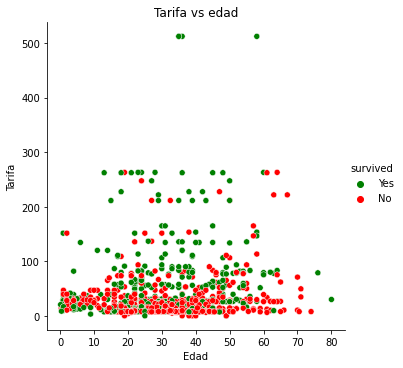

In [ ]:
#Dispersograma con Seaborn
graf_relplot=sns.relplot(data=ds_trabajo,x="age", y="fare", hue="survived",palette=["g", "r"]).set(title="Tarifa vs edad",xlabel='Edad',ylabel='Tarifa')

#### Gráfico de violín

###### Muestra la distribución de una variable cuantitativa condicionada a distintos valores de una variable categórica, de forma que las distribuciones pueden ser comparadas de forma visual rápidamente.

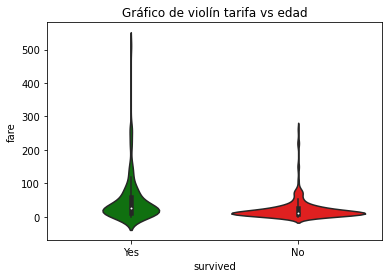

In [ ]:
#Gráfico de violín Seaborn
ax = sns.violinplot(x="survived", y="fare", data=ds_trabajo,palette=["g", "r"]).set(title="Gráfico de violín tarifa vs edad",xlabel='survived',ylabel='fare') 

#### Heatmap

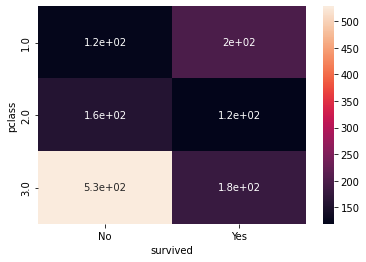

In [ ]:
tabla=pd.crosstab(ds_trabajo['pclass'], ds_trabajo['survived'])

grf=sns.heatmap(tabla,annot=True)

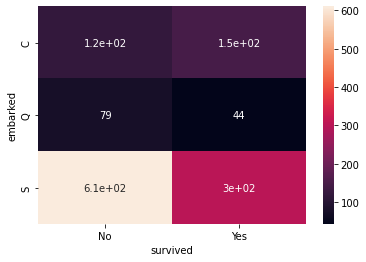

In [ ]:
tabla=pd.crosstab(ds_trabajo['embarked'], ds_trabajo['survived'])

grf=sns.heatmap(tabla,annot=True)

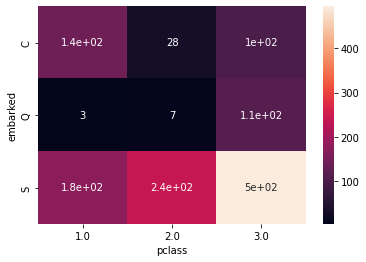

In [ ]:
tabla=pd.crosstab(ds_trabajo['embarked'], ds_trabajo['pclass'])

grf=sns.heatmap(tabla,annot=True)